# Injury Level: Death - No resistance / Not armed

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
incident_df = pd.read_pickle('./dataframes/incident_df.pkl')

In [9]:
civilian_df = pd.read_pickle('./dataframes/civ_inc_df.pkl')

In [10]:
officer_df = pd.read_pickle('./dataframes/off_inc_df.pkl')

In [11]:
civ_cols = ['CIVILIAN_Mental_Status', 'CIVILIAN_Assaulted_Officer',
            'CIVILIAN_Highest_Charge', 'CIVILIAN_Crime_Qualifier',
            'CIVILIAN_Perceived_Armed', 'CIVILIAN_Perceived_Armed_Weapon',
            'CIVILIAN_Firearm_Type', 'CIVILIAN_Resisted',
            'CIVILIAN_Resistance_Type', 'CIVILIAN_Custody_Status',
            'CIVILIAN_Confirmed_Armed', 'CIVILIAN_Confirmed_Armed_Weapon',
            'CIVILIAN_K12_Type']

off_cols = ['OFFICER_Officer_Used_Force',
            'OFFICER_Officer_Used_Force_Reason', 'OFFICER_On_Duty',
            'OFFICER_Dress']

civilian_df = civilian_df.drop(off_cols, axis=1)

officer_df = officer_df.drop(civ_cols, axis=1)

In [12]:
death_df = civilian_df[civilian_df['Injury_Level'] == 'Death']

In [13]:
death_df.shape

(157, 49)

## Officers Involved in Death Cases

In [14]:
death_ids = list(death_df['Incident_ID'].unique())
len(death_ids)

155

In [15]:
death_officers_involved_df = pd.DataFrame()

for id_ in death_ids:
    df = officer_df[officer_df['Incident_ID'] == id_]
    death_officers_involved_df = death_officers_involved_df.append(df)

In [16]:
total_death_involved = death_officers_involved_df['Age'].value_counts().sum()

In [17]:
list(death_officers_involved_df['Age'].value_counts())

[99, 79, 62, 44, 43, 17, 7, 1, 1]

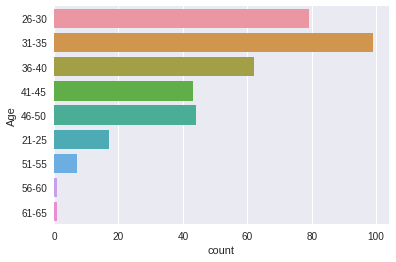

In [18]:
sns.countplot(y='Age', data=death_officers_involved_df)

## "Passive non-compliant" resistance

In [19]:
resistance_cols = ['CIVILIAN_Resisted', 'CIVILIAN_Resistance_Type']

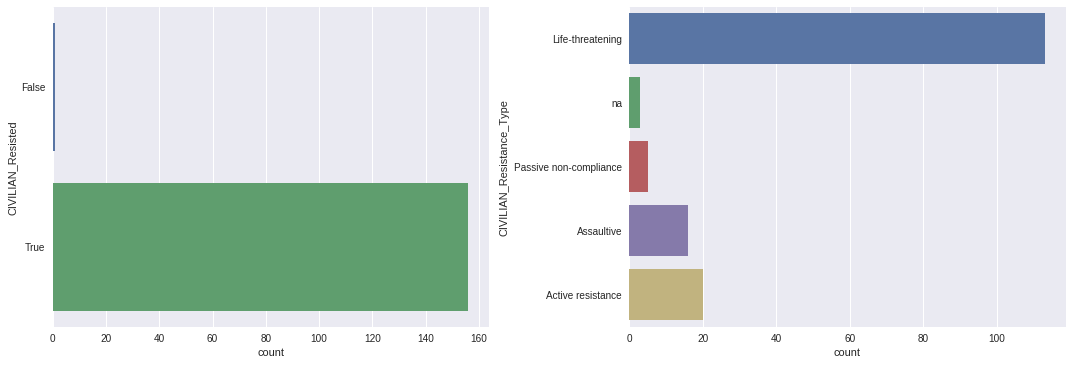

In [20]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(resistance_cols):
    fig.add_subplot(10,2,i+1)
    sns.countplot(y=col, data=death_df)

fig.tight_layout()

### Death cases in which civilians' resistance was "passive non-compliant"

In [21]:
death_resistance_passive_df = death_df[death_df['CIVILIAN_Resistance_Type'] == 'Passive non-compliance']

In [22]:
death_resistance_passive_df

,Incident_ID,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Injury_Level,Injury_Type,Medical_Aid,Injury_From_Preexisting_Condition,...,Crime_Report_Filed,Contact_Reason,In_Custody_Reason,Num_Involved_Civilians,Num_Involved_Officers,Month,Weekday,Hour,Loc_Latitude,Loc_Longitude
74,URSUS-07-0000-2016-HDY,Civilian,Male,White,46-50,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,True,Call for Service,na,1,3,3,3,22,37.8077,-121.639718
282,URSUS-15-0200-2016-GXJ,Civilian,Male,Hispanic,71-75,True,Death,"Internal injury, Gunshot wound",Medical assistance - treated on scene,False,...,True,Crime in Progress / Investigating Suspicious P...,na,1,1,12,0,0,35.1091,-119.022716
1183,URSUS-29-0000-2016-DAE,Civilian,Male,White,31-35,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,True,Call for Service,na,1,2,12,1,3,39.1767,-120.964687
1591,URSUS-34-0000-2016-QXT,Civilian,Male,White,17-Oct,True,Death,"Abrasion/Laceration, Gunshot wound",Medical assistance - treated on scene,False,...,True,Call for Service,na,1,2,11,3,13,38.6273,-121.319849
1792,URSUS-36-0300-2016-UVA,Civilian,Male,Hispanic,21-25,True,Death,Gunshot wound,Admitted to hospital - critical injuries,False,...,True,Crime in Progress / Investigating Suspicious P...,na,2,2,9,0,17,34.0559,-117.326389


### Respective officers involved

In [23]:
passive_resistance_ids = list(death_resistance_passive_df['Incident_ID'].unique())
passive_resistance_ids

['URSUS-07-0000-2016-HDY',
 'URSUS-15-0200-2016-GXJ',
 'URSUS-29-0000-2016-DAE',
 'URSUS-34-0000-2016-QXT',
 'URSUS-36-0300-2016-UVA']

In [24]:
drp_officers_involved_df = pd.DataFrame()

for id_ in passive_resistance_ids:
    df = officer_df[officer_df['Incident_ID'] == id_]
    drp_officers_involved_df = drp_officers_involved_df.append(df)

In [31]:
drp_officers_involved_df[['Order_Of_Force_Specified', 'Order_Of_Force_Str', 'Received_Force',
       'Received_Force_Type', 'DISCHARGE_OF_FIREARM_INDIVIDUAL',
       'DISCHARGE_OF_FIREARM_INCIDENT', 'OFFICER_Officer_Used_Force',
       'OFFICER_Officer_Used_Force_Reason', 'OFFICER_On_Duty', 'OFFICER_Dress']]

,Order_Of_Force_Specified,Order_Of_Force_Str,Received_Force,Received_Force_Type,DISCHARGE_OF_FIREARM_INDIVIDUAL,DISCHARGE_OF_FIREARM_INCIDENT,OFFICER_Officer_Used_Force,OFFICER_Officer_Used_Force_Reason,OFFICER_On_Duty,OFFICER_Dress
75,na,na,False,na,False,True,True,To effect arrest or take into custody,True,Tactical
76,na,na,False,na,False,True,True,To effect arrest or take into custody,True,Tactical
77,na,na,False,na,False,True,True,To effect arrest or take into custody,True,Tactical
283,na,na,False,na,False,True,False,na,True,Patrol Uniform
1184,na,na,True,Threat of firearm,False,True,True,To overcome resistance,True,Patrol Uniform
1185,na,na,True,Threat of firearm,False,True,True,To overcome resistance,True,Patrol Uniform
1592,na,na,False,na,False,True,True,"To effect arrest or take into custody, To prev...",True,Patrol Uniform
1593,na,na,False,na,False,True,True,"To effect arrest or take into custody, To prev...",True,Patrol Uniform
1793,na,na,True,Civilian vehicle contact,False,True,True,"To effect arrest or take into custody, To prev...",True,Patrol Uniform
1794,na,na,True,Civilian vehicle contact,False,True,True,"To effect arrest or take into custody, To over...",True,Patrol Uniform


## Not perceived/confirmed armed

In [24]:
armed_cols = ['CIVILIAN_Perceived_Armed', 'CIVILIAN_Confirmed_Armed']

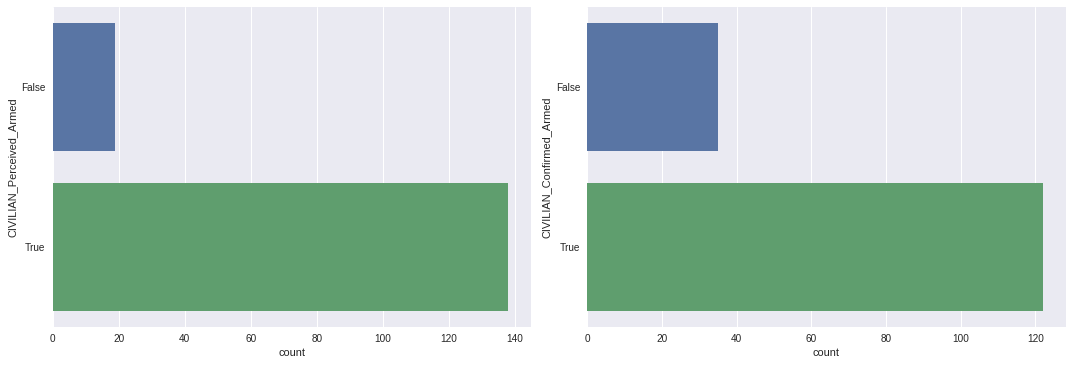

In [25]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(armed_cols):
    fig.add_subplot(10,2,i+1)
    sns.countplot(y=col, data=death_df)

fig.tight_layout()

### Death cases in which civilians was not "perceived armed"

In [26]:
death_not_perceived_armed_df = death_df[death_df['CIVILIAN_Perceived_Armed'] == False]

#### From gunshot

In [27]:
gunshot_death_not_perceived_armed_df = death_not_perceived_armed_df[
                                        death_not_perceived_armed_df['Injury_Type'] == 'Gunshot wound']

In [28]:
gunshot_death_not_perceived_armed_df

,Incident_ID,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Injury_Level,Injury_Type,Medical_Aid,Injury_From_Preexisting_Condition,...,Multiple_Locations,On_K12_Campus,Arrest_Made,Crime_Report_Filed,Contact_Reason,In_Custody_Reason,Num_Involved_Civilians,Num_Involved_Officers,Month,Weekday
673,URSUS-19-4100-2016-EYF,Civilian,Male,Asian / Pacific Islander,26-30,True,Death,Gunshot wound,Admitted to hospital - critical injuries,False,...,False,False,False,True,"Pre-Planned Activity (arrest/search warrant, p...",na,1,3,6,1
1084,URSUS-19-7200-2016-PWD,Civilian,Female,Black,36-40,True,Death,Gunshot wound,Admitted to hospital - critical injuries,False,...,False,False,False,True,Call for Service,na,1,3,10,0
1358,URSUS-30-1900-2016-JGM,Civilian,Male,Hispanic,31-35,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,False,False,False,True,Vehicle / Bike / Pedestrian Stop,na,1,2,11,6
1361,URSUS-30-1900-2016-KXA,Civilian,Male,Hispanic,31-35,True,Death,Gunshot wound,Admitted to hospital - critical injuries,False,...,False,False,False,True,Crime in Progress / Investigating Suspicious P...,na,1,2,8,0
1370,URSUS-30-1900-2016-VZF,Civilian,Male,Hispanic,31-35,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,False,False,False,True,Call for Service,na,2,1,2,3
1577,URSUS-33-4200-2016-USY,Civilian,Male,Asian / Pacific Islander,31-35,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,False,False,True,True,Welfare Check,na,1,5,10,5
1792,URSUS-36-0300-2016-UVA,Civilian,Male,Hispanic,21-25,True,Death,Gunshot wound,Admitted to hospital - critical injuries,False,...,False,True,True,True,Crime in Progress / Investigating Suspicious P...,na,2,2,9,0
1976,URSUS-37-0000-2016-RYU,Civilian,Male,White,26-30,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,False,False,False,True,Call for Service,na,1,3,8,4
2047,URSUS-37-1100-2016-AZF,Civilian,Male,Asian / Pacific Islander,26-30,True,Death,Gunshot wound,Medical assistance - treated on scene,False,...,False,False,False,True,"Pre-Planned Activity (arrest/search warrant, p...",na,1,4,5,2
2100,URSUS-38-0100-2016-PCW,Civilian,Female,Black,26-30,True,Death,Gunshot wound,Medical assistance - treated on scene,True,...,False,False,False,True,Crime in Progress / Investigating Suspicious P...,na,1,1,5,3


#### Other wound

In [29]:
other_death_not_perceived_armed_df = death_not_perceived_armed_df[
                                        death_not_perceived_armed_df['Injury_Type'] != 'Gunshot wound']

In [30]:
other_death_not_perceived_armed_df

,Incident_ID,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Injury_Level,Injury_Type,Medical_Aid,Injury_From_Preexisting_Condition,...,Multiple_Locations,On_K12_Campus,Arrest_Made,Crime_Report_Filed,Contact_Reason,In_Custody_Reason,Num_Involved_Civilians,Num_Involved_Officers,Month,Weekday
430,URSUS-19-0000-2016-JSC,Civilian,Male,Hispanic,26-30,True,Death,Unconscious,Admitted to hospital - other circumstance,False,...,False,False,False,True,Call for Service,na,1,4,8,0
555,URSUS-19-0000-2016-YKP,Civilian,Male,White,36-40,True,Death,Unconscious,Medical assistance - treated on scene,False,...,True,False,False,True,Call for Service,na,1,4,9,1
1008,URSUS-19-4200-2016-YEB,Civilian,Male,Hispanic,41-45,True,Death,Unconscious,Medical assistance - treated on scene,False,...,False,False,False,True,In Custody Event,Awaiting Booking,1,2,6,3
1290,URSUS-30-0100-2016-DPN,Civilian,Male,Hispanic,31-35,True,Death,Unconscious,Admitted to hospital - critical injuries,False,...,True,False,True,True,Call for Service,na,1,2,7,6
1658,URSUS-34-9900-2016-KKN,Civilian,Male,White,41-45,True,Death,Unconscious,Medical assistance - treated on scene,False,...,False,False,True,True,Call for Service,na,1,3,12,2
2035,URSUS-37-0500-2016-YKC,Civilian,Female,White,21-25,True,Death,"Internal injury, Obvious disfigurement, Gunsho...",Admitted to hospital - critical injuries,False,...,False,False,True,True,Crime in Progress / Investigating Suspicious P...,na,2,1,1,5
2066,URSUS-37-1100-2016-GJT,Civilian,Male,White,51-55,True,Death,na,na,na,...,False,False,True,False,Call for Service,na,1,2,12,0
2167,URSUS-39-0500-2016-WBU,Civilian,Male,Hispanic,26-30,True,Death,Unconscious,Admitted to hospital - critical injuries,False,...,False,False,False,True,Vehicle / Bike / Pedestrian Stop,na,1,2,3,0


### Respective officers Involved

#### From gunshot

In [31]:
gunshot_death_not_percevied_armed_id_list = list(gunshot_death_not_perceived_armed_df['Incident_ID'].unique())
gunshot_death_not_percevied_armed_id_list

['URSUS-19-4100-2016-EYF',
 'URSUS-19-7200-2016-PWD',
 'URSUS-30-1900-2016-JGM',
 'URSUS-30-1900-2016-KXA',
 'URSUS-30-1900-2016-VZF',
 'URSUS-33-4200-2016-USY',
 'URSUS-36-0300-2016-UVA',
 'URSUS-37-0000-2016-RYU',
 'URSUS-37-1100-2016-AZF',
 'URSUS-38-0100-2016-PCW',
 'URSUS-39-0500-2016-SPH']

In [32]:
gunshot_death_not_perceived_armed_officers_df = pd.DataFrame()

for id_ in gunshot_death_not_percevied_armed_id_list:
    df = officer_df[officer_df['Incident_ID'] == id_]
    gunshot_death_not_perceived_armed_officers_df = gunshot_death_not_perceived_armed_officers_df.append(df)

In [33]:
gunshot_death_not_perceived_armed_officers_df

,Incident_ID,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Injury_Level,Injury_Type,Medical_Aid,Injury_From_Preexisting_Condition,...,Multiple_Locations,On_K12_Campus,Arrest_Made,Crime_Report_Filed,Contact_Reason,In_Custody_Reason,Num_Involved_Civilians,Num_Involved_Officers,Month,Weekday
674,URSUS-19-4100-2016-EYF,Officer,Male,White,46-50,False,na,na,na,na,...,False,False,False,True,"Pre-Planned Activity (arrest/search warrant, p...",na,1,3,6,1
675,URSUS-19-4100-2016-EYF,Officer,Male,Asian / Pacific Islander,26-30,False,na,na,na,na,...,False,False,False,True,"Pre-Planned Activity (arrest/search warrant, p...",na,1,3,6,1
676,URSUS-19-4100-2016-EYF,Officer,Male,White,41-45,False,na,na,na,na,...,False,False,False,True,"Pre-Planned Activity (arrest/search warrant, p...",na,1,3,6,1
1085,URSUS-19-7200-2016-PWD,Officer,Male,Asian / Pacific Islander,41-45,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,3,10,0
1086,URSUS-19-7200-2016-PWD,Officer,Male,White,36-40,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,3,10,0
1087,URSUS-19-7200-2016-PWD,Officer,Male,White,51-55,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,3,10,0
1359,URSUS-30-1900-2016-JGM,Officer,Male,White,26-30,True,Injury,Abrasion/Laceration,Medical assistance - treated at facility and r...,False,...,False,False,False,True,Vehicle / Bike / Pedestrian Stop,na,1,2,11,6
1360,URSUS-30-1900-2016-JGM,Officer,Male,Hispanic,26-30,True,Injury,Abrasion/Laceration,Medical assistance - treated on scene,False,...,False,False,False,True,Vehicle / Bike / Pedestrian Stop,na,1,2,11,6
1362,URSUS-30-1900-2016-KXA,Officer,Male,Hispanic,31-35,True,Injury,Abrasion/Laceration,Medical assistance - treated on scene,False,...,False,False,False,True,Crime in Progress / Investigating Suspicious P...,na,1,2,8,0
1363,URSUS-30-1900-2016-KXA,Officer,Male,White,36-40,True,Injury,"Contusion, Abrasion/Laceration",Medical assistance - treated on scene,False,...,False,False,False,True,Crime in Progress / Investigating Suspicious P...,na,1,2,8,0


#### Other wound

In [34]:
other_death_not_percevied_armed_id_list = list(other_death_not_perceived_armed_df['Incident_ID'].unique())
other_death_not_percevied_armed_id_list

['URSUS-19-0000-2016-JSC',
 'URSUS-19-0000-2016-YKP',
 'URSUS-19-4200-2016-YEB',
 'URSUS-30-0100-2016-DPN',
 'URSUS-34-9900-2016-KKN',
 'URSUS-37-0500-2016-YKC',
 'URSUS-37-1100-2016-GJT',
 'URSUS-39-0500-2016-WBU']

In [35]:
other_death_not_perceived_armed_officers_df = pd.DataFrame()

for id_ in other_death_not_percevied_armed_id_list:
    df = officer_df[officer_df['Incident_ID'] == id_]
    other_death_not_perceived_armed_officers_df = other_death_not_perceived_armed_officers_df.append(df)

In [36]:
other_death_not_perceived_armed_officers_df

,Incident_ID,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Injury_Level,Injury_Type,Medical_Aid,Injury_From_Preexisting_Condition,...,Multiple_Locations,On_K12_Campus,Arrest_Made,Crime_Report_Filed,Contact_Reason,In_Custody_Reason,Num_Involved_Civilians,Num_Involved_Officers,Month,Weekday
431,URSUS-19-0000-2016-JSC,Officer,Female,Hispanic,31-35,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,4,8,0
432,URSUS-19-0000-2016-JSC,Officer,Male,Hispanic,26-30,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,4,8,0
433,URSUS-19-0000-2016-JSC,Officer,Male,Hispanic,31-35,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,4,8,0
434,URSUS-19-0000-2016-JSC,Officer,Male,White,31-35,False,na,na,na,na,...,False,False,False,True,Call for Service,na,1,4,8,0
556,URSUS-19-0000-2016-YKP,Officer,Male,Hispanic,26-30,True,Injury,Abrasion/Laceration,Medical assistance - treated at facility and r...,False,...,True,False,False,True,Call for Service,na,1,4,9,1
557,URSUS-19-0000-2016-YKP,Officer,Male,Hispanic,31-35,True,Injury,Abrasion/Laceration,Medical assistance - treated at facility and r...,False,...,True,False,False,True,Call for Service,na,1,4,9,1
558,URSUS-19-0000-2016-YKP,Officer,Male,Hispanic,41-45,True,Injury,Abrasion/Laceration,Medical assistance - treated at facility and r...,False,...,True,False,False,True,Call for Service,na,1,4,9,1
559,URSUS-19-0000-2016-YKP,Officer,Male,White,31-35,True,Injury,Abrasion/Laceration,Medical assistance - treated at facility and r...,False,...,True,False,False,True,Call for Service,na,1,4,9,1
1009,URSUS-19-4200-2016-YEB,Officer,Male,Asian / Pacific Islander,36-40,False,na,na,na,na,...,False,False,False,True,In Custody Event,Awaiting Booking,1,2,6,3
1010,URSUS-19-4200-2016-YEB,Officer,Male,Hispanic,36-40,False,na,na,na,na,...,False,False,False,True,In Custody Event,Awaiting Booking,1,2,6,3


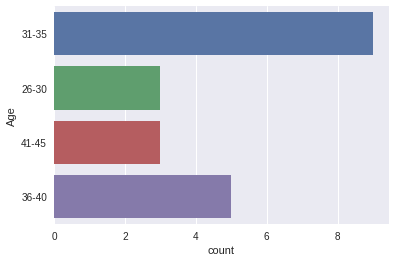

In [37]:
sns.countplot(y='Age', data=other_death_not_perceived_armed_officers_df)

# Death Cases by Location

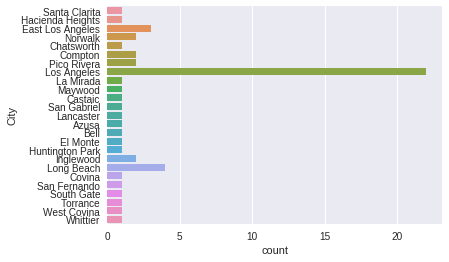

In [41]:
sns.countplot(y='City', data=death_df[death_df['County'] == 'Los Angeles County'])